In [1]:
%matplotlib inline

from plot import figure, plot_points, plot_line, plot_polygon
from point import Point, point_list

import numpy as np

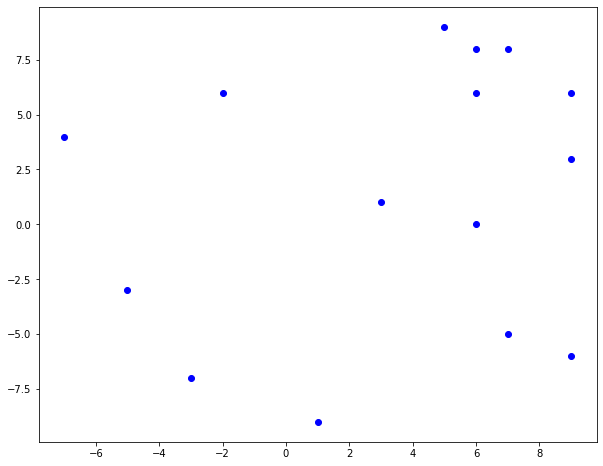

In [2]:
points = point_list([(-3, -7), (9, -6), (-5, -3), (-7, 4), (6, 8), (1, -9), (7, 8), (5, 9), (9, 3), (6, 0), (3, 1), (-2, 6), (9, 6), (7, -5), (6, 6)])

fig = figure()
plot_points(fig, points)

In [3]:
points.sort(key=lambda p: (p.x, p.y))

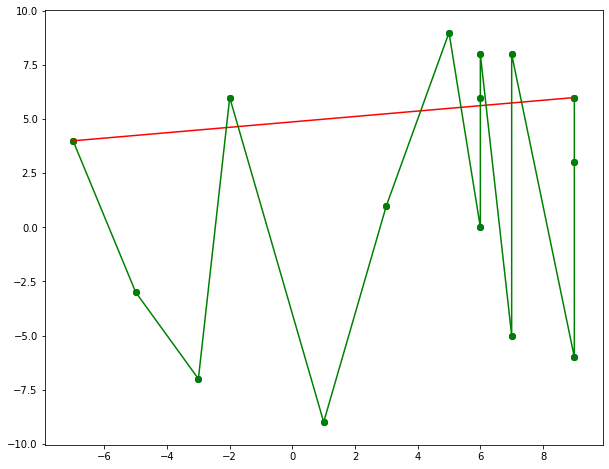

In [4]:
fig = figure()
plot_points(fig, points)
plot_line(fig, [points[0], points[-1]], color='r')
plot_line(fig, points, color='g')

In [5]:
def area2(a, b, c):
    v1 = b - a
    v2 = c - a
    return v1.x * v2.y - v1.y * v2.x    

upper = [points[0], points[1]]
for i in range(2, len(points)):
    c = points[i]
    while len(upper) >= 2:
        a, b = upper[-2], upper[-1]
        if area2(a, b, c) > 0:
            upper.pop()
        else:
            break
            
    upper.append(c)

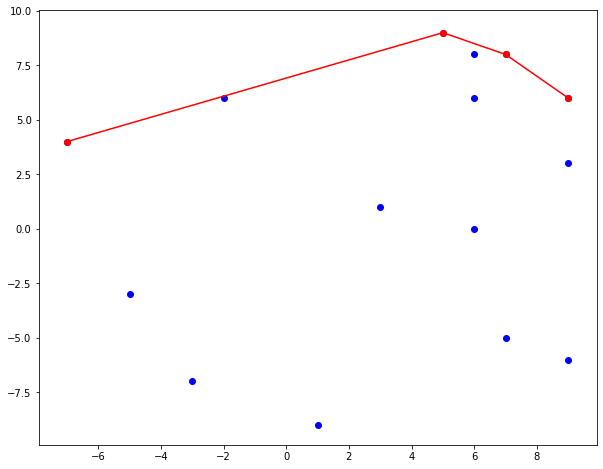

In [6]:
fig = figure()
plot_points(fig, points)
plot_line(fig, upper, color='r')

In [7]:
lower = [points[-1], points[-2]]
for i in reversed(range(len(points) - 2)):
    c = points[i]
    while len(lower) >= 2:
        a, b = lower[-2], lower[-1]
        if area2(a, b, c) > 0:
            lower.pop()
        else:
            break
            
    lower.append(c)

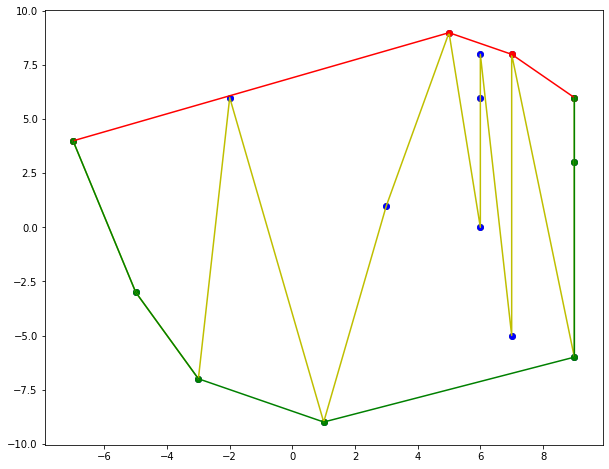

In [8]:
fig = figure()
plot_line(fig, points, color='y')
plot_points(fig, points)
plot_line(fig, upper, color='r')
plot_line(fig, lower, color='g')

In [9]:
print(upper)
print(lower)

[(-7,4), (5,9), (7,8), (9,6)]
[(9,6), (9,3), (9,-6), (1,-9), (-3,-7), (-5,-3), (-7,4)]


In [10]:
hull = upper[:-1] + lower[:-1]

In [11]:
print(hull)

[(-7,4), (5,9), (7,8), (9,6), (9,3), (9,-6), (1,-9), (-3,-7), (-5,-3)]


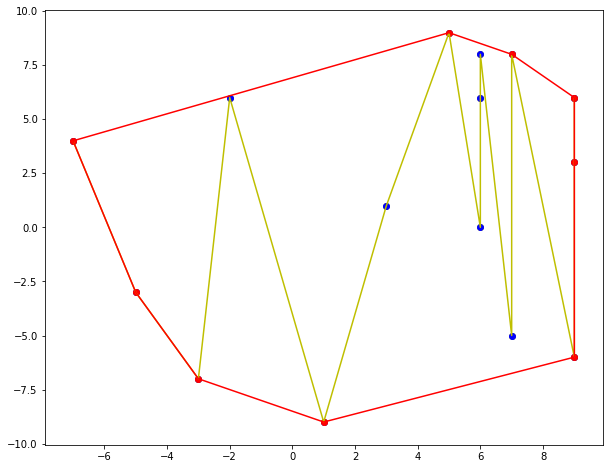

In [12]:
fig = figure()
plot_line(fig, points, color='y')
plot_points(fig, points)
plot_polygon(fig, hull, color='r')